# Project Introduction

**Modeling Mental Health & of Lifestyle Choice**\
This project explores the relationships between lifestyle choices and their significant impact on individuals' overall mental health. Our team believes that this is an important investigation, with the potential to provide actionable insights and support informed decisions that promote mental well-being. We analyze data from the 2023 Behavioral Risk Factor Surveillance System (BRFSS) which includes over 430,000 participants across the U.S. This survey data contains health related behaviors and outcomes from various factors
Our primary research question is **How do lifestyle choices like excericse, smoking and alcohol consumption impact self-reported mental health?**. We are intrested in identifying patterns that reveal whether engaging in healthier lifestyle correlates with better mental health outcomes, against the number of days per month respondents report experiencing poor mental health. To answer our question, we explore the potential cases and relationships between these factors accounting for demographic factors: age, education and income.We hope to generate insights that not only support individual decision-making but also inform public health recommendations, ultimately promoting wellness through positive lifestyle changes

**Changes to data**\


# Imports

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Categorical Data Cleaning:

In [92]:
# Load the dataset
cleaned_df = pd.read_csv('cleaned_brfss_2023.csv')

In [93]:
# changing: 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3'

# changing GENHLTH values: 1: Excellent, 2: Very good, 3: Good, 4: Fair, 5: Poor, 7: Not sure, 9: Refused, Blank: Missing
cleaned_df['GENHLTH'] = cleaned_df['GENHLTH'].replace({1: 'Excellent', 2: 'Very good', 3: 'Good', 4: 'Fair', 5: 'Poor', 7: 'Not sure', 9: 'Refused'})

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
cleaned_df['GENHLTH'] = pd.Categorical(cleaned_df['GENHLTH'], categories=genhlth_order, ordered=True)

# changing MENTHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['MENTHLTH'] = cleaned_df['MENTHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing PHYSHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['PHYSHLTH'] = cleaned_df['PHYSHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing POORHLTH values: 88: None, 77: Not sure, 99: Refused
cleaned_df['POORHLTH'] = cleaned_df['POORHLTH'].replace({88: 'Not sure', 77: 'Refused', 99: 'Refused'})

# changing EXERANY2 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['EXERANY2'] = cleaned_df['EXERANY2'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCSCNC1 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCSCNC1'] = cleaned_df['CHCSCNC1'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCOCNC1 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCOCNC1'] = cleaned_df['CHCOCNC1'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing CHCCOPD3 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['CHCCOPD3'] = cleaned_df['CHCCOPD3'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing DIABETE4 values: 1: Yes, 2: Yes, but female told only during pregnancy, 3: No, 4: No, pre-diabetes or borderline diabetes , 7: Not sure, 9: Refused
cleaned_df['DIABETE4'] = cleaned_df['DIABETE4'].replace({1: 'Yes', 2: 'Yes, but female told only during pregnancy', 3: 'No', 4: 'No, pre-diabetes or borderline diabetes', 7: 'Not sure', 9: 'Refused'})

# changing MARITAL values: 1: Married, 2: Divorced, 3: Widowed, 4: Separated, 5: Never married, 6: A member of an unmarried couple, 9: Refused
cleaned_df['MARITAL'] = cleaned_df['MARITAL'].replace({1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Never married', 6: 'A member of an unmarried couple', 9: 'Refused'})

# changing EDUCA values: 
#   1: Never attended school or only kindergarten, 
#   2: Grades 1 through 8 (Elementary), 
#   3: Grades 9 through 11 (Some high school), 
#   4: Grade 12 or GED (High school graduate), 
#   5: College 1 year to 3 years (Some college or technical school), 
#   6: College 4 years or more (College graduate), 
#   9: Refused
cleaned_df['EDUCA'] = cleaned_df['EDUCA'].replace({1: 'Never attended school or only kindergarten', 2: 'Grades 1 through 8 (Elementary)', 3: 'Grades 9 through 11 (Some high school)', 4: 'Grade 12 or GED (High school graduate)', 5: 'College 1 year to 3 years (Some college or technical school)', 6: 'College 4 years or more (College graduate)', 9: 'Refused'})

educa_order = ['Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)',
               'Grades 9 through 11 (Some high school)', 'Grade 12 or GED (High school graduate)', 
               'College 1 year to 3 years (Some college or technical school)', 
               'College 4 years or more (College graduate)']

cleaned_df['EDUCA'] = pd.Categorical(cleaned_df['EDUCA'], categories=educa_order, ordered=True)


# changing EMPLOY1 values: 
#   1: Employed for wages, 
#   2: Self-employed,
#   3: Out of work for 1 year or more, 
#   4: Out of work for less than 1 year, 
#   5: A homemaker, 
#   6: A student, 
#   7: Retired, 
#   8: Unable to work, 
#   9: Refused
cleaned_df['EMPLOY1'] = cleaned_df['EMPLOY1'].replace({1: 'Employed for wages', 2: 'Self-employed', 3: 'Out of work for 1 year or more', 4: 'Out of work for less than 1 year', 5: 'A homemaker', 6: 'A student', 7: 'Retired', 8: 'Unable to work', 9: 'Refused'})

# changing INCOME3 values:
#   1: Less than $10,000,
#   2: Less than $15,000
#   3: Less than $20,000
#   4: Less than $25,000
#   5: Less than $35,000
#   7: Less than $50,000
#   8: Less than $75,000
#   9: Less than $100,000
#   10: Less than $150,000
#   11: Less than $200,000
#   12: $200,000 or more
#   77: Not sure
#   99: Refused
cleaned_df['INCOME3'] = cleaned_df['INCOME3'].replace({1: 'Less than $10,000', 2: 'Less than $15,000', 3: 'Less than $20,000', 4: 'Less than $25,000', 5: 'Less than $35,000', 7: 'Less than $50,000', 8: 'Less than $75,000', 9: 'Less than $100,000', 10: 'Less than $150,000', 11: 'Less than $200,000', 12: '$200,000 or more', 77: 'Not sure', 99: 'Refused'})

income_order = ['Less than $10,000', 'Less than $15,000', 'Less than $20,000', 
                'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 
                'Less than $75,000', 'Less than $100,000', 'Less than $150,000', 
                'Less than $200,000', '$200,000 or more']

cleaned_df['INCOME3'] = pd.Categorical(cleaned_df['INCOME3'], categories=income_order, ordered=True)


# changing SMOKE100 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['SMOKE100'] = cleaned_df['SMOKE100'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing SMOKDAY2 values:
#   1: Every day,
#   2: Some days,
#   3: Not at all,
#   7: Not sure,
#   9: Refused
cleaned_df['SMOKDAY2'] = cleaned_df['SMOKDAY2'].replace({1: 'Every day', 2: 'Some days', 3: 'Not at all', 7: 'Not sure', 9: 'Refused'})

# changing ALCDAY4 values:
#   if 101-199: Number of drinks in past week (calculated by number - 100)
#   if 201-299: Number of drinks in past month (calculated by number - 200)
#   777: Not sure
#   888: No drinks in past week
#   999: Refused
#   To better calculate the average number of drinks per day, we will convert the values that are in the range 201-299 to the equivalent number of drinks per week by subtracting 100 and then dividing by 4.34524 (average number of weeks in a month). 
#   We will also convert the values that are in the range 101-199 to the equivalent number of drinks per week by subtrcting 100
cleaned_df['ALCDAY4'] = cleaned_df['ALCDAY4'].apply(lambda x: (x - 200) / 4.34524 if x >= 201 and x <= 299 else x - 100 if x >= 101 and x <= 199 else x)

# changing AVEDRNK3 values:
#   if 1- 76: Number of drinks per day
#   77: Not sure
#   88: None
#   99: Refused
cleaned_df['AVEDRNK3'] = cleaned_df['AVEDRNK3'].replace({77: 'Not sure', 88: 'None', 99: 'Refused'})

# changing DRNK3GE5 values:
#   if 1-76: Number of times in past 30 days drank 5 or more drinks (men) or 4 or more drinks (women)
#   77: Not sure
#   88: None
#   99: Refused
cleaned_df['DRNK3GE5'] = cleaned_df['DRNK3GE5'].replace({77: 'Not sure', 88: 'None', 99: 'Refused'})


# changing MAXDRNKS values:
#   if 1-76: Max num of drinks on any occasion
#   77: Not sure
#   88: Invalid response
#   99: Refused
cleaned_df['MAXDRNKS'] = cleaned_df['MAXDRNKS'].replace({77: 'Not sure', 88: 'Invalid response', 99: 'Refused'})

# changing FLUSHOT7 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['FLUSHOT7'] = cleaned_df['FLUSHOT7'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing HIVTST7 values: 1: Yes, 2: No, 7: Not sure, 9: Refused
cleaned_df['HIVTST7'] = cleaned_df['HIVTST7'].replace({1: 'Yes', 2: 'No', 7: 'Not sure', 9: 'Refused'})

# changing _TOTINDA values: 1: Yes, 2: No, 9: Not sure/Refused/Missing
cleaned_df['_TOTINDA'] = cleaned_df['_TOTINDA'].replace({1: 'Yes', 2: 'No', 9: 'Not sure/Refused/Missing'})

# changing _RACEGR3 values: 
#   1: White only, Non-Hispanic, 
#   2: Black only, Non-Hispanic,
#   3: Other race only, Non-Hispanic,
#   4: Multiracial, Non-Hispanic,
#   5: Hispanic,
#   9: Not sure/Refused
cleaned_df['_RACEGR3'] = cleaned_df['_RACEGR3'].replace({1: 'White only, Non-Hispanic', 2: 'Black only, Non-Hispanic', 3: 'Other race only, Non-Hispanic', 4: 'Multiracial, Non-Hispanic', 5: 'Hispanic', 9: 'Not sure/Refused'})

# changing _AGEG5YR values:
#   1: 18-24 years,
#   2: 25-29 years,
#   3: 30-34 years,
#   4: 35-39 years,
#   5: 40-44 years,
#   6: 45-49 years,
#   7: 50-54 years,
#   8: 55-59 years,
#   9: 60-64 years,
#   10: 65-69 years,
#   11: 70-74 years,
#   12: 75-79 years,
#   13: 80 or older
#   14: Not sure/Refused/Missing
cleaned_df['_AGEG5YR'] = cleaned_df['_AGEG5YR'].replace({1: '18-24 years', 2: '25-29 years', 3: '30-34 years', 4: '35-39 years', 5: '40-44 years', 6: '45-49 years', 7: '50-54 years', 8: '55-59 years', 9: '60-64 years', 10: '65-69 years', 11: '70-74 years', 12: '75-79 years', 13: '80 or older', 14: 'Not sure/Refused/Missing'})

age_order = ['18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
             '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
             '70-74 years', '75-79 years', '80 or older']

cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

# changing _AGE65YR values: 1: Age 18 to 64, 2: Age 65 or older, 9: Not sure/Refused/Missing
cleaned_df['_AGE65YR'] = cleaned_df['_AGE65YR'].replace({1: 'Age 18 to 64', 2: 'Age 65 or older', 9: 'Not sure/Refused/Missing'})

# changing _EDUCAG values:
#   1: Did not graduate High School
#   2: Graduated High School
#   3: Attended College or Technical School
#   4: Graduated from College or Technical School
#   9: Not sure/Refused/Missing
cleaned_df['_EDUCAG'] = cleaned_df['_EDUCAG'].replace({1: 'Did not graduate High School', 2: 'Graduated High School', 3: 'Attended College or Technical School', 4: 'Graduated from College or Technical School', 9: 'Not sure/Refused/Missing'})

# changing _INCOMG1 values:
#   1: Less than $15,000
#   2: $15,000 - $25,000
#   3: $25,000 - $35,000
#   4: $35,000 - $50,000
#   5: $50,000 - $100,000
#   6: $100,000 - $200,000
#   7: $200,000 or more
#   9: Not sure/Refused/Missing
cleaned_df['_INCOMG1'] = cleaned_df['_INCOMG1'].replace({1: 'Less than $15,000', 2: '$15,000 - $25,000', 3: '$25,000 - $35,000', 4: '$35,000 - $50,000', 5: '$50,000 - $100,000', 6: '$100,000 - $200,000', 7: '$200,000 or more', 9: 'Not sure/Refused/Missing'})

# changing _RFSMOK3 values:
#   1: Not a current smoker
#   2: Current smoker
#   9: Not sure/Refused/Missing
cleaned_df['_RFSMOK3'] = cleaned_df['_RFSMOK3'].replace({1: 'Not a current smoker', 2: 'Current smoker', 9: 'Not sure/Refused/Missing'})

rfsmok_order = ['Not a current smoker', 'Current smoker']
cleaned_df['_RFSMOK3'] = pd.Categorical(cleaned_df['_RFSMOK3'], categories=rfsmok_order, ordered=True)

# Set non-numeric responses to NaN for relevant health columns
for col in ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

In [94]:
def replace_with_nan(df, cols, values):
    for col in cols:
        df[col] = df[col].replace(values, np.nan)
    return df

# Columns where non-informative responses should be converted to NaN
non_informative_values = ['Not sure', 'Refused', 'Don\'t know/Refused/Missing']

# Replace non-informative values with NaN
cols_to_replace_nan = ['GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 
                       'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 
                       'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', 
                       '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3']

cleaned_df = replace_with_nan(cleaned_df, cols_to_replace_nan, non_informative_values)


# Set columns to numeric if they contain numeric values and NaNs for non-informative entries
numeric_cols = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
cleaned_df[numeric_cols] = cleaned_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Quick check to see unique values across each column after cleaning
for col in cleaned_df.columns:
    print(f"Unique values in {col}: {cleaned_df[col].unique()}\n")

Unique values in GENHLTH: ['Very good', 'Fair', 'Good', 'Poor', 'Excellent', NaN]
Categories (5, object): ['Excellent' < 'Very good' < 'Good' < 'Fair' < 'Poor']

Unique values in PHYSHLTH: [nan  6.  2.  8.  1.  5.  4. 30. 15. 21. 10. 25. 14.  7. 20.  3. 12. 26.
  9. 24. 18. 13. 28. 23. 16. 17. 11. 29. 27. 22. 19.]

Unique values in MENTHLTH: [nan  2.  3. 10. 25.  5. 30. 20. 15. 12.  4.  1.  6. 21. 14.  7. 29.  8.
 18. 16. 17.  9. 28. 13. 22. 11. 24. 27. 23. 26. 19.]

Unique values in POORHLTH: [nan  1. 30. 25.  9.  5. 14.  2.  3. 10. 15.  7.  8. 20.  4. 28.  6. 18.
 13. 12. 16. 29. 26. 21. 23. 22. 27. 19. 11. 17. 24.]

Unique values in EXERANY2: ['No' 'Yes' nan]

Unique values in CHCSCNC1: ['No' 'Yes' nan]

Unique values in CHCOCNC1: ['No' 'Yes' nan]

Unique values in CHCCOPD3: ['No' 'Yes' nan]

Unique values in DIABETE4: ['Yes' 'No' 'Yes, but female told only during pregnancy' nan
 'No, pre-diabetes or borderline diabetes']

Unique values in MARITAL: ['Married' 'Divorced' 'Widowed' 'A

In [95]:
# adding variable labels for 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'DIABETE4', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME3', 'SMOKE100', 'SMOKDAY2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'HIVTST7', '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_AGE65YR', '_EDUCAG', '_INCOMG1', '_RFSMOK3'


var_labels = {
    'GENHLTH': 'General health',
    'PHYSHLTH': 'Number of Days Physical Health Not Good',
    'MENTHLTH': 'Number of Days Mental Health Not Good',
    'POORHLTH': 'Poor Physical or Mental Health',
    'EXERANY2': 'Exercise in the past 30 days',
    'CHCSCNC1': 'Ever told you had skin cancer',
    'CHCOCNC1': 'Ever told you had cancer (excluding skin cancer)',
    'CHCCOPD3': 'Ever told you had C.O.P.D. emphysema or chronic bronchitis?',
    'DIABETE4': 'Ever told you had diabetes',
    'MARITAL': 'Marital status',
    'EDUCA': 'Education level',
    'EMPLOY1': 'Employment status',
    'INCOME3': 'Income level',
    'SMOKE100': ' Smoked at Least 100 Cigarettes',
    'SMOKDAY2': 'Frequency of Days Now Smoking',
    'ALCDAY4': 'Days drink alcohol in the past 30 days',
    'AVEDRNK3': 'Avg alcoholic drinks per day in past 30',
    'DRNK3GE5': 'Binge drinking',
    'MAXDRNKS': 'Maximum number of drinks in past month',
    'FLUSHOT7': 'Adult flu shot/spray past 12 mos',
    'HIVTST7': 'Ever tested H.I.V.',
    '_TOTINDA': 'Adults who reported doing physical activity or exercise during the past 30 days other than their regular job',
    '_RACEGR3': ' Five-level race/ethnicity category',
    '_AGEG5YR': ' Fourteen-level age category',
    '_AGE65YR': ' Two-level age category',
    '_EDUCAG': ' Level of education completed',
    '_INCOMG1': ' Income categories',
    '_RFSMOK3': ' Is a current smoker?'
}

# Exclude Refused and Not sure in MENTHLTH
cleaned_df = cleaned_df[~cleaned_df['MENTHLTH'].isin(['Refused', 'Not sure'])]
cleaned_df['_AGEG5YR'] = pd.Categorical(cleaned_df['_AGEG5YR'], categories=age_order, ordered=True)

# Plotting and Data Analysis:

In [96]:
selected_colors = [
    "#FFEA85",  # Pineapple Soda
    "#F698DB",  # Berry Pop
    "#E1EEAF",  # Palm Leaf
    "#FFD3E4",  # Cherry Blossom
    "#92D1FF",  # Pool Day
    "#FFD058",  # Lemonade Stand
    "#AFDFEE",  # Blue Lagoon
    "#FFBDB4",  # Peach Smoothie
    "#F1EBE4",  # Coconut Milk
    "#F72967",  # Raspberry Sorbet
    "#4BC6D7",  # Splish Splash
    "#BCACDD"   # Fresh Lavender
]

boolean_colors = ["#E1EEAF", "#F698DB"]

color_palette = dict(zip(genhlth_order, selected_colors))

No handles with labels found to put in legend.


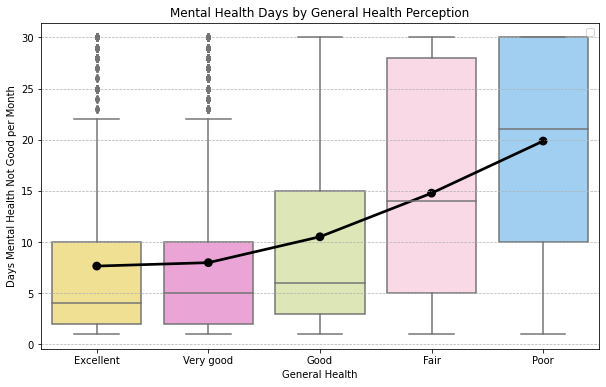

In [97]:
genhlth_palette = {
    'Excellent': "#FFEA85", 
    'Very good': "#F698DB", 
    'Good': "#E1EEAF",      
    'Fair': "#FFD3E4",      
    'Poor': "#92D1FF"       
}

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, palette=genhlth_palette)

#confidence intervals
sns.pointplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, order=genhlth_order, ci = 0.95, color='black', 
              markers='o', linestyles='-', label='Mean Mental Health Days')

plt.title('Mental Health Days by General Health Perception')
plt.xlabel('General Health')
plt.ylabel('Days Mental Health Not Good per Month')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()  
plt.show()





H0:  Mean number of days mental health is not good is the same across all general categories.

H1: At least one category is different

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MENTHLTH ~ C(GENHLTH)', data=cleaned_df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq        df            F  PR(>F)
C(GENHLTH)  2.106439e+06       4.0  5920.749069     0.0
Residual    1.492359e+07  167788.0          NaN     NaN


Test Statistic:\
F: 5920.74
P = 0

Decision:\
Reject H0

Conclusion:\
Since P is less than 0.05 we have enough evidence to reject the null hypothesis. \
This indicates that poorer general health perception significantly have more days of poor mental health compared to those with better health

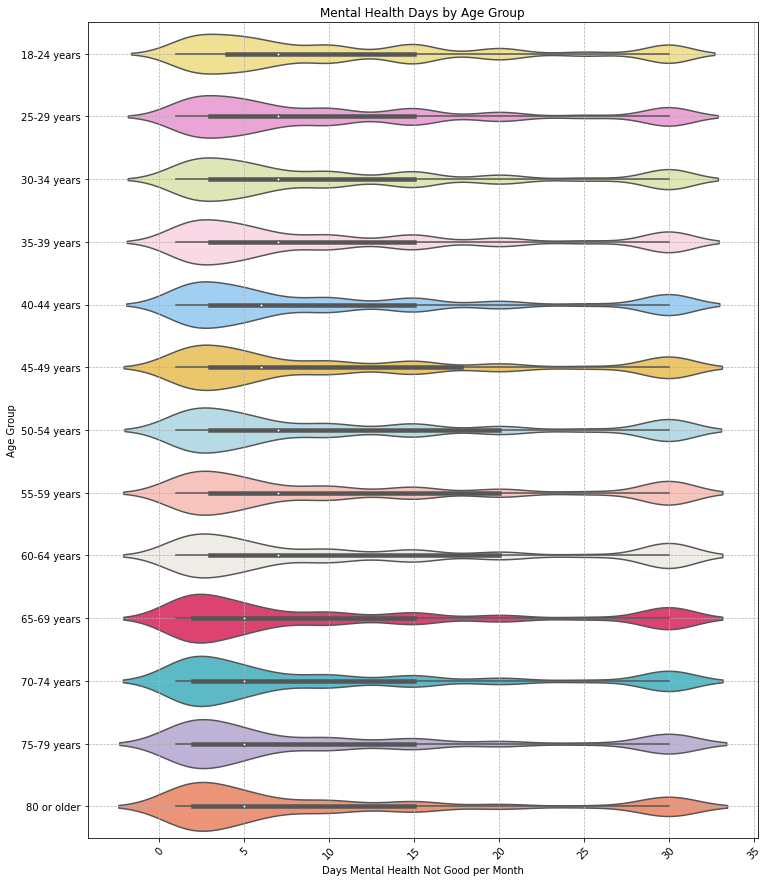

In [99]:
age_palette = {
    '18-24 years': "#FFEA85", 
    '25-29 years': "#F698DB",
    '30-34 years': "#E1EEAF",
    '35-39 years': "#FFD3E4",
    '40-44 years': "#92D1FF",
    '45-49 years': "#FFD058",
    '50-54 years': "#AFDFEE",
    '55-59 years': "#FFBDB4",
    '60-64 years': "#F1EBE4",
    '65-69 years': "#F72967",
    '70-74 years': "#4BC6D7",
    '75-79 years': "#BCACDD",
    '80 or older': "#FF8A65"
}

# Order for age categories
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

# Violin plot for MENTHLTH across age groups with custom palette
plt.figure(figsize=(12, 15))  # Adjusted size to better fit age categories
sns.violinplot(x='MENTHLTH', y='_AGEG5YR', data=cleaned_df, order=age_order, palette=age_palette)

# Customize plot aesthetics
plt.title('Mental Health Days by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Days Mental Health Not Good per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Light grid on y-axis
plt.grid(axis='x', linestyle='--', linewidth=0.7)  # Light grid on x-axis

plt.show()


H0: The meean number of days health is (not good) is the same for all age groups
H1: Atleast one mean pair is not equal

In [100]:
model = ols('MENTHLTH ~ C(_AGEG5YR)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df         F        PR(>F)
C(_AGEG5YR)  2.672303e+04      12.0  21.97729  2.053426e-49
Residual     1.682139e+07  166009.0       NaN           NaN


Test Statistic:\
F: 21.98
P = 2.05*10^-49

Decision:\
Reject H0

Conclusion:\
Since P is less than 0.05 (close to zero) so we have enough evidence to reject the null hypothesis. \



In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

cleaned_df = cleaned_df.dropna(subset=['MENTHLTH', '_AGEG5YR'])
tukey = pairwise_tukeyhsd(endog=cleaned_df['MENTHLTH'], groups=cleaned_df['_AGEG5YR'], alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
18-24 years 25-29 years  -0.2956 0.3784 -0.6877  0.0965  False
18-24 years 30-34 years  -0.1882    0.9  -0.571  0.1946  False
18-24 years 35-39 years  -0.2583 0.5485 -0.6392  0.1226  False
18-24 years 40-44 years  -0.4372 0.0105 -0.8216 -0.0529   True
18-24 years 45-49 years  -0.0776    0.9 -0.4752    0.32  False
18-24 years 50-54 years  -0.0232    0.9 -0.4108  0.3645  False
18-24 years 55-59 years   0.3812 0.0586 -0.0059  0.7683  False
18-24 years 60-64 years   0.4886 0.0015  0.1078  0.8694   True
18-24 years 65-69 years  -0.4338 0.0148  -0.825 -0.0427   True
18-24 years 70-74 years  -0.8586  0.001 -1.2659 -0.4514   True
18-24 years 75-79 years    -0.83  0.001 -1.2783 -0.3816   True
18-24 years 80 or older  -0.9359  0.001 -1.3971 -0.4748   True
25-29 years 30-34 years   0.1075    0.9 -0.2982  0.5131

As seen above, the significant differences are between younger and older age groups which suggest a trend where mental health varies by age.
Particulary age groups 18-24 have fewer days of poor mental health compared to age groups 70-74 and 75-79. this is an indication that mental health issues are positively correlated with age.

No handles with labels found to put in legend.


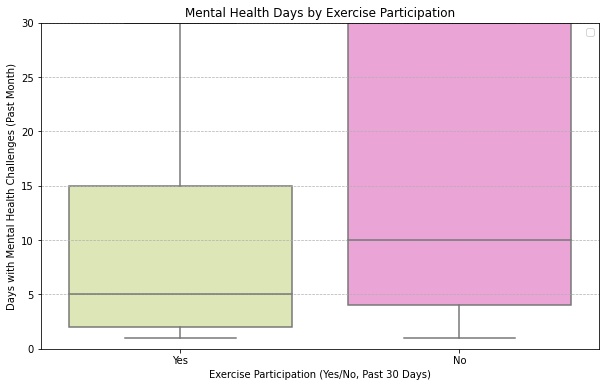

No handles with labels found to put in legend.


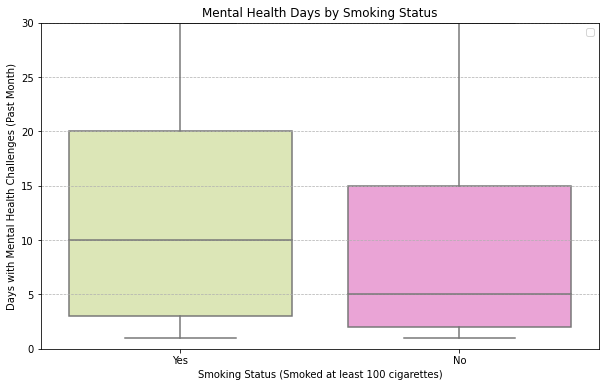

In [102]:
def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=boolean_colors)

    # Set y-axis limits if desired
    plt.ylim(0, 30)

    # Add grid, title, labels, and legend
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    plt.show()


# Plot for Exercise Participation
enhanced_boxplot(
    data=cleaned_df,
    x='EXERANY2',
    y='MENTHLTH',
    title='Mental Health Days by Exercise Participation',
    xlabel='Exercise Participation (Yes/No, Past 30 Days)',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

# Plot for Smoking Status
enhanced_boxplot(
    data=cleaned_df,
    x='SMOKE100',
    y='MENTHLTH',
    title='Mental Health Days by Smoking Status',
    xlabel='Smoking Status (Smoked at least 100 cigarettes)',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=selected_colors
)

H0: there is no difference with mental health challenges between individuals who exercise and those who don't
H1: there is a difference in mean number of days with mental health challenges between individuals who excercised and didn't.

In [103]:
model = ols('MENTHLTH ~ C(EXERANY2)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)




                   sum_sq        df            F  PR(>F)
C(EXERANY2)  6.640352e+05       1.0  6817.864133     0.0
Residual     1.613390e+07  165652.0          NaN     NaN


Test Statistic:\
F: 6817.86
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have enough evidence to reject the null hypothesis. \

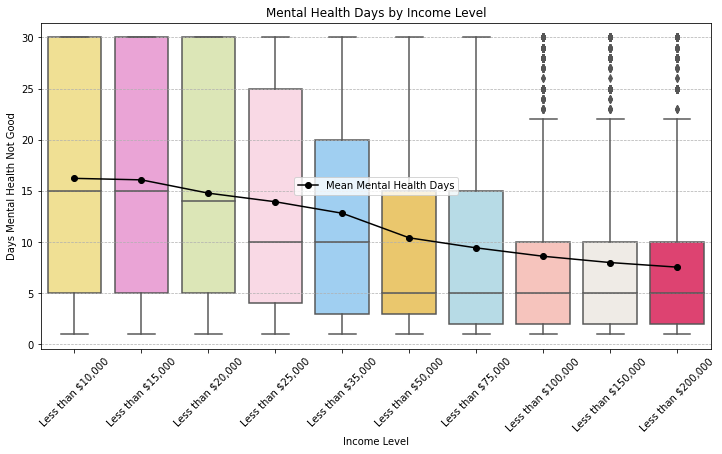

In [104]:
income_palette = {
    'Less than $10,000': "#FFEA85",
    'Less than $15,000': "#F698DB",
    'Less than $20,000': "#E1EEAF",
    'Less than $25,000': "#FFD3E4",
    'Less than $35,000': "#92D1FF",
    'Less than $50,000': "#FFD058",
    'Less than $75,000': "#AFDFEE",
    'Less than $100,000': "#FFBDB4",
    'Less than $150,000': "#F1EBE4",
    'Less than $200,000': "#F72967",
    '$200,000 or more': "#4BC6D7"
}

income_order = [
    'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000',
    'Less than $35,000', 'Less than $50,000', 'Less than $75,000', 'Less than $100,000',
    'Less than $150,000', 'Less than $200,000', '$200,000 or more'
]

income_means = cleaned_df.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)

plt.figure(figsize=(12, 6))
sns.boxplot(x='INCOME3', y='MENTHLTH', data=cleaned_df, order=income_order, palette=income_palette)
plt.plot(range(len(income_order)), income_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Mental Health Days by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


(H0): Income level does not have a significant effect on the number of days of poor mental health. (H1): Income level has a significant effect on the number of days of poor mental health

In [105]:
model = ols('MENTHLTH ~ C(INCOME3)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq        df           F  PR(>F)
C(INCOME3)  9.128847e+05      10.0  987.880902     0.0
Residual    1.109566e+07  120072.0         NaN     NaN


c:\Users\zaki2\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '



Test Statistic:\
F: 987.880902
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


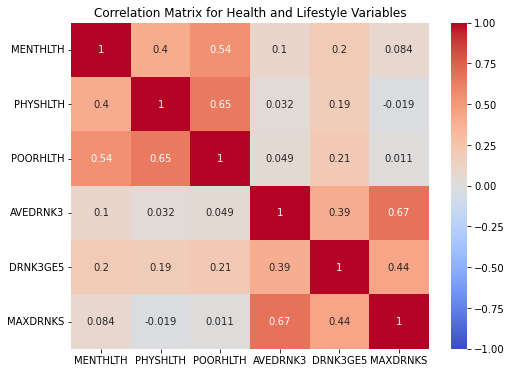

In [106]:
# Selecting numeric columns for correlation
numeric_columns = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
corr_matrix = cleaned_df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Health and Lifestyle Variables')
plt.show()



 (H0): Exercise frequency does not have a significant effect on the number of days of poor mental health.  (H1): Exercise frequency has a significant effect on the number of days of poor mental health


In [107]:
conditions = [
    (cleaned_df['PHYSHLTH'] <= 5),
    (cleaned_df['PHYSHLTH'] > 5) & (cleaned_df['PHYSHLTH'] <= 15),
    (cleaned_df['PHYSHLTH'] > 15)
]
categories = ['Low', 'Medium', 'High']
cleaned_df['PHYSHLTH_Category'] = pd.cut(cleaned_df['PHYSHLTH'], bins=[-float("inf"), 5, 15, float("inf")], labels=categories)

# Fit the ANOVA model
model = ols('MENTHLTH ~ C(PHYSHLTH_Category)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                            sum_sq       df           F  PR(>F)
C(PHYSHLTH_Category)  1.533952e+06      2.0  8219.67623     0.0
Residual              8.536165e+06  91482.0         NaN     NaN



Test Statistic:\
F:  8219.67623
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


In [108]:
# Frequency counts for each category
for col in ['GENHLTH', 'EXERANY2', 'SMOKE100', '_AGEG5YR', 'INCOME3', 'EMPLOY1']:
    print(f"\nFrequency for {var_labels[col]}:")
    print(cleaned_df[col].value_counts())



Frequency for General health:
Good         56330
Very good    49212
Fair         31642
Excellent    15916
Poor         12543
Name: GENHLTH, dtype: int64

Frequency for Exercise in the past 30 days:
Yes    123556
No      42098
Name: EXERANY2, dtype: int64

Frequency for  Smoked at Least 100 Cigarettes:
No     94506
Yes    64254
Name: SMOKE100, dtype: int64

Frequency for  Fourteen-level age category:
18-24 years    16391
60-64 years    14412
35-39 years    14401
30-34 years    14132
40-44 years    13924
55-59 years    13562
50-54 years    13490
65-69 years    13058
25-29 years    12948
45-49 years    12326
70-74 years    11349
75-79 years     8350
80 or older     7679
Name: _AGEG5YR, dtype: int64

Frequency for Income level:
Less than $50,000     22929
Less than $100,000    20216
Less than $75,000     18840
Less than $35,000     15886
Less than $200,000     9555
Less than $150,000     9361
Less than $25,000      7862
Less than $20,000      5723
Less than $15,000      4966
Less than $10

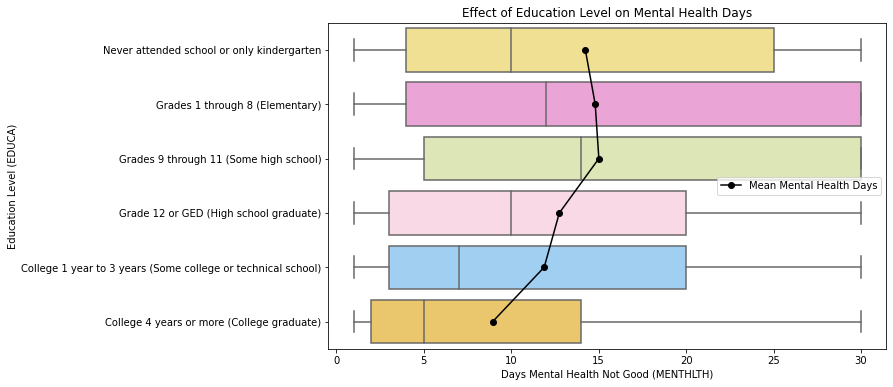

In [109]:
edu_palette = {
    'Never attended school or only kindergarten': "#FFEA85",
    'Grades 1 through 8 (Elementary)': "#F698DB",
    'Grades 9 through 11 (Some high school)': "#E1EEAF",
    'Grade 12 or GED (High school graduate)': "#FFD3E4",
    'College 1 year to 3 years (Some college or technical school)': "#92D1FF",
    'College 4 years or more (College graduate)': "#FFD058"
}

edu_order = [
    'Never attended school or only kindergarten', 
    'Grades 1 through 8 (Elementary)', 
    'Grades 9 through 11 (Some high school)', 
    'Grade 12 or GED (High school graduate)', 
    'College 1 year to 3 years (Some college or technical school)', 
    'College 4 years or more (College graduate)'
]

edu_means = cleaned_df.groupby('EDUCA')['MENTHLTH'].mean().reindex(edu_order)

plt.figure(figsize=(10, 6))
sns.boxplot(y='EDUCA', x='MENTHLTH', data=cleaned_df, palette=edu_palette, order=edu_order)
plt.plot(edu_means.values, range(len(edu_order)), color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Effect of Education Level on Mental Health Days')
plt.ylabel('Education Level (EDUCA)')
plt.xlabel('Days Mental Health Not Good (MENTHLTH)')
plt.legend()
plt.show()


(H0): Education level has no significant effect on the number of days of poor mental health. 
(H1): Education level has a significant effect on the number of days of poor mental health.


In [110]:
model = ols('MENTHLTH ~ C(EDUCA)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq        df            F  PR(>F)
C(EDUCA)  5.976046e+05       5.0  1222.023828     0.0
Residual  1.619418e+07  165575.0          NaN     NaN



Test Statistic:\
F: 1222.023828
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


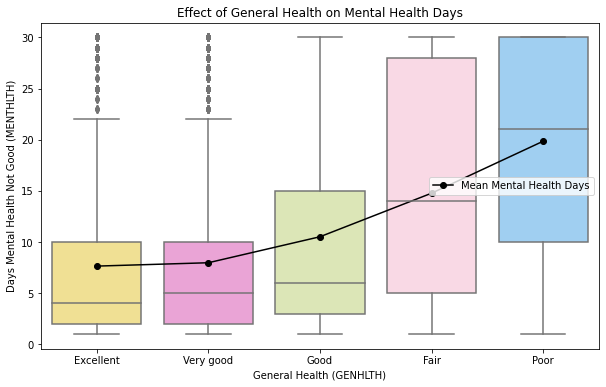

In [111]:
genhlth_palette = {
    'Excellent': "#FFEA85",
    'Very good': "#F698DB",
    'Good': "#E1EEAF",
    'Fair': "#FFD3E4",
    'Poor': "#92D1FF"
}

genhlth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

genhlth_means = cleaned_df.groupby('GENHLTH')['MENTHLTH'].mean().reindex(genhlth_order)

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENHLTH', y='MENTHLTH', data=cleaned_df, palette=genhlth_palette, order=genhlth_order)
plt.plot(range(len(genhlth_order)), genhlth_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Effect of General Health on Mental Health Days')
plt.xlabel('General Health (GENHLTH)')
plt.ylabel('Days Mental Health Not Good (MENTHLTH)')
plt.legend()
plt.show()


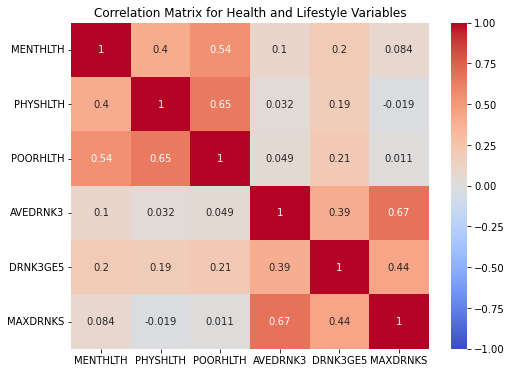

In [112]:
# Selecting numeric columns for correlation
numeric_columns = ['MENTHLTH', 'PHYSHLTH', 'POORHLTH', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS']
corr_matrix = cleaned_df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Health and Lifestyle Variables')
plt.show()

 (H0): There is no significant correlation between mental health days  and physical health days.
 (H1): There is significant correlation between mental health days and physical health days.


In [113]:
conditions = [
    (cleaned_df['PHYSHLTH'] <= 5),
    (cleaned_df['PHYSHLTH'] > 5) & (cleaned_df['PHYSHLTH'] <= 15),
    (cleaned_df['PHYSHLTH'] > 15)
]
categories = ['Low', 'Medium', 'High']
cleaned_df['PHYSHLTH_Category'] = pd.cut(cleaned_df['PHYSHLTH'], bins=[-float("inf"), 5, 15, float("inf")], labels=categories)

model = ols('MENTHLTH ~ C(PHYSHLTH_Category)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq       df           F  PR(>F)
C(PHYSHLTH_Category)  1.533952e+06      2.0  8219.67623     0.0
Residual              8.536165e+06  91482.0         NaN     NaN


Test Statistic:\
F:  8219.67623
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


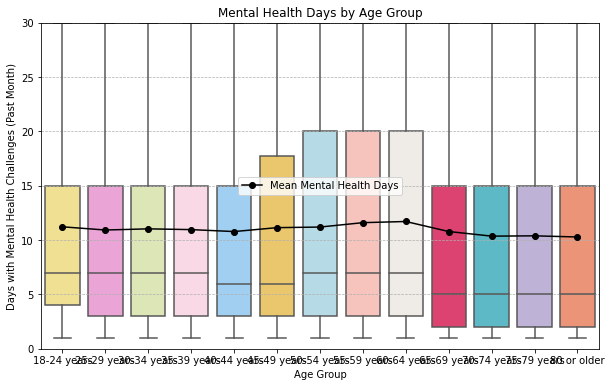

In [114]:
# Function to plot boxplot with custom color palette and trend line for means
def enhanced_boxplot(data, x, y, title, xlabel, ylabel, palette=None, order=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette=palette, order=order)  # Pass the palette and order

    # Calculate and plot mean trend line if order is provided (for ordinal data)
    if order:
        means = data.groupby(x)[y].mean().reindex(order)
        plt.plot(range(len(order)), means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')

    # Set y-axis limits and add grid, title, labels, and legend
    plt.ylim(0, 30)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Example usage with an ordinal variable and custom color palette (age groups)
age_order = [
    '18-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years',
    '45-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years',
    '70-74 years', '75-79 years', '80 or older'
]

enhanced_boxplot(
    data=cleaned_df,
    x= '_AGEG5YR',
    y='MENTHLTH',
    title='Mental Health Days by Age Group',
    xlabel='Age Group',
    ylabel='Days with Mental Health Challenges (Past Month)',
    palette=age_palette,  # Dictionary-based palette for age groups
    order=age_order  # Specify the order for age categories
)



(H0): Age group has no significant effect on the number of days with mental health challenges.
(H1): Age group has a significant effect on the number of days with mental health challenges.



In [115]:

model = ols('MENTHLTH ~ C(_AGEG5YR)', data=cleaned_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq        df         F        PR(>F)
C(_AGEG5YR)  2.672303e+04      12.0  21.97729  2.053426e-49
Residual     1.682139e+07  166009.0       NaN           NaN


Test Statistic:\
F:  21.97729
P = 2.053426e-49

Decision:\
Reject H0

Conclusion:\
Since P = 2.053426e-49 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


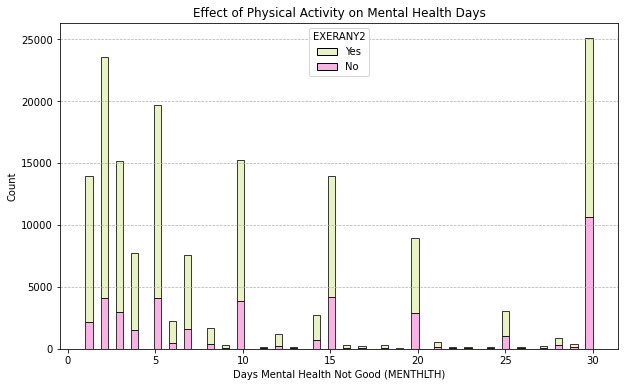

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='MENTHLTH', hue='EXERANY2', multiple='stack', palette=boolean_colors)
plt.title('Effect of Physical Activity on Mental Health Days')
plt.xlabel('Days Mental Health Not Good (MENTHLTH)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


(H0): Physical activity does not have a significant effect on the number of days of poor mental health.
(H1): Physical activity has a significant effect on the number of days of poor mental health.




In [117]:
from scipy.stats import ttest_ind

# Separate the groups based on physical activity
exercise_group = cleaned_df[cleaned_df['EXERANY2'] == 'Yes']['MENTHLTH']
no_exercise_group = cleaned_df[cleaned_df['EXERANY2'] == 'No']['MENTHLTH']

# Perform the t-test
t_stat, p_value = ttest_ind(exercise_group, no_exercise_group, equal_var=False)

# Print the t-test result
print("T-test statistic:", t_stat)
print("p-value:", p_value)

T-test statistic: -76.77643464724753
p-value: 0.0


Test Statistic:\
T: -76.77643464724753
P = 0

Decision:\
Reject H0

Conclusion:\
Since P = 0 is less than 0.05,  we have sufficient evidence to reject the null hypothesis. \


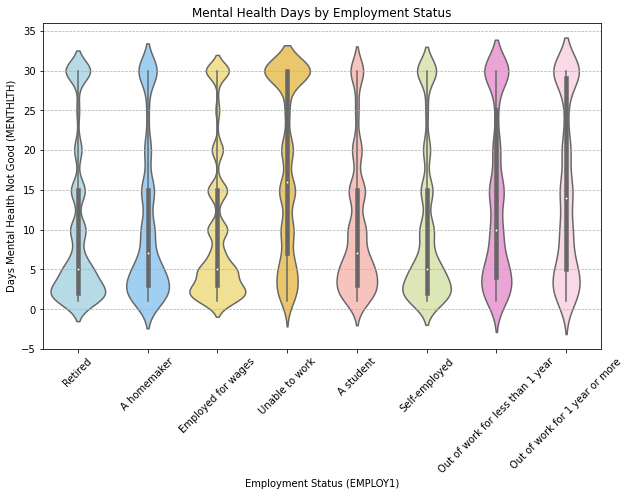

In [118]:
# Updated color palette for all employment status categories
employ_palette = {
    'Employed for wages': "#FFEA85",   # Pineapple Soda
    'Self-employed': "#E1EEAF",        # Palm Leaf
    'Out of work for less than 1 year': "#F698DB",  # Berry Pop
    'Out of work for 1 year or more': "#FFD3E4",    # Cherry Blossom
    'A homemaker': "#92D1FF",          # Pool Day
    'A student': "#FFBDB4",            # Peach Smoothie
    'Retired': "#AFDFEE",              # Blue Lagoon
    'Unable to work': "#FFD058"        # Lemonade Stand
}

plt.figure(figsize=(10, 6))
sns.violinplot(x='EMPLOY1', y='MENTHLTH', data=cleaned_df, palette=employ_palette)
plt.title('Mental Health Days by Employment Status')
plt.xlabel('Employment Status (EMPLOY1)')
plt.ylabel('Days Mental Health Not Good (MENTHLTH)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


In [119]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Health Variables')
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ANOVA for mental health days across different levels of general health (GENHLTH)
anova_result = stats.f_oneway(cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
                              cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'])
print("ANOVA result for GENHLTH:", anova_result)

# Correlation test between Alcohol Consumption (ALCDAY4) and Mental Health Days (MENTHLTH)
corr, p_val = stats.pearsonr(cleaned_df['ALCDAY4'], cleaned_df['MENTHLTH'])
print("Correlation between ALCDAY4 and MENTHLTH:", corr, "p-value:", p_val)

# Linear Regression Model with MENTHLTH as the dependent variable
model = smf.ols('MENTHLTH ~ GENHLTH + EDUCA + _TOTINDA + ALCDAY4', data=cleaned_df).fit()
print(model.summary())


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/951612058.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],


ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
Correlation between ALCDAY4 and MENTHLTH: nan p-value: nan
                            OLS Regression Results                            
Dep. Variable:               MENTHLTH   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2257.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:52:11   Log-Likelihood:            -6.1071e+05
No. Observations:              167163   AIC:                         1.221e+06
Df Residuals:                  167150   BIC:                         1.222e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          

In [ ]:
# Contingency table for mental health category vs general health

contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['GENHLTH'])
print(contingency_table)

GENHLTH       Excellent   Fair   Good  Poor  Very good
MENTHLTH_cat                                          
Low               12803  15452  37874  3714      38589
Medium             1739   7141  10250  2586       6544
High               1584   9481   9018  6407       4609


In [ ]:


# Example: ANOVA for mental health across levels of general health (GENHLTH)
anova_result = stats.f_oneway(
    cleaned_df[cleaned_df['GENHLTH'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 2]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 3]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 4]['MENTHLTH'],
    cleaned_df[cleaned_df['GENHLTH'] == 5]['MENTHLTH']
)
print("ANOVA result for GENHLTH:", anova_result)

# Example: t-test for mental health based on exercise status (EXERANY2)
ttest_result = stats.ttest_ind(
    cleaned_df[cleaned_df['EXERANY2'] == 1]['MENTHLTH'],
    cleaned_df[cleaned_df['EXERANY2'] == 2]['MENTHLTH']
)
print("T-test result for EXERANY2:", ttest_result)


ANOVA result for GENHLTH: F_onewayResult(statistic=nan, pvalue=nan)
T-test result for EXERANY2: TtestResult(statistic=nan, pvalue=nan, df=nan)


/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/3768852311.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(
/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_91061/3768852311.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_result = stats.ttest_ind(


In [ ]:
# Categorize MENTHLTH into bins
cleaned_df['MENTHLTH_cat'] = pd.cut(cleaned_df['MENTHLTH'], bins=[0, 10, 20, 100], labels=['Low', 'Medium', 'High'])

# Contingency table for mental health category vs smoking status
contingency_table = pd.crosstab(cleaned_df['MENTHLTH_cat'], cleaned_df['SMOKE100'])

# Chi-square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-square test for MENTHLTH and SMOKE100:", chi2, p)


Chi-square test for MENTHLTH and SMOKE100: 3009.026514808543 0.0


explanation about why you thought this was an interesting hypothesis to investigate

# Reflections

**What is the hardest part of the project that you've encountered so far?**\
The most challenging task was the initial file processing and data loading. We had to convert the dataset from SAS to Python, which involved complex encoding issues that made it difficult for us to interpret the data. We tried different encoding methods, like ASCII encoding, but it was hard to interpret because it contained missing values. This was very time consuming and challenging for us.  

**What are your initial insights?**\
Our initial thoughts were that we had extensive data to work with, which seemed overwhelming. We needed to narrow down the variables for our requirement. We had to do some research to find relevant columns for this use case and only consider important factors influencing mental health. We noticed that there were a lot of hidden relationships between health-related behaviors and outcomes. 

**Are there any concrete results you can show at this point? If not, why not?**\
Yes! We were able to run a few models to produce some concrete results. Our data visualizations, trends, and hypothesis tests highlight clear relationships between the lifestyle factors we shortlisted and mental health outcomes that support our hypothesis.

**Going forward, what are the current biggest problems you're facing?**\
At the moment, our biggest challenges include refining our feature selection and improving our model approach. Although we've narrowed down the columns, we're now focusing on selecting the most relevant features and testing. We hope to use better modeling and sampling techniques, such as bagging, to improve accuracy and run more tests to ensure statistical correctness. 

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**\
Yes, the professor's feedback on our exploratory data analysis is positive, so we believe that we have a solid foundation for further work. We plan to refine our narrative on the relationships of the variables and create clear visual representations for our presentation. This will make it easier for us to reach everyone more effectively. 

**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it's better than your current results?**
Yes, it is. Our initial exploration has found some valuable insights that support our hypothesis about the impact of lifestyle choices on mental health. We believe that refining our models and testing techniques can yield better and more precise results for deeper insights. 



# Roles

# Next Steps